In [1]:
%cd ..
%pwd

/home/andrej/myStuff/berkeley/Spring 2022/STAT222/Economic_Networks


'/home/andrej/myStuff/berkeley/Spring 2022/STAT222/Economic_Networks'

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import networkx as nx

In [3]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
# plt.rc("text", usetex=False)
plt.rcParams['figure.dpi'] = 300
# plt.rcParams['font.size'] = 8
plt.rcParams['xtick.labelsize'] = 10

plt.rcParams['agg.path.chunksize'] = 10000

In [4]:
from econnet import data, simulator, deltaz

# Commodities

In [21]:
supp_comm = supply.loc[:, "Unnamed: 1"][4:]

These give us the "commodities" that are used, but not supplied - i.e. government spending etc.

In [ ]:
supp_comm

In [22]:
set(use_comm) - set(supp_comm)

{'Compensation of employees',
 'Gross operating surplus',
 'Less: Subsidies',
 'Other taxes on production',
 'Taxes on products and imports',
 'Total Intermediate',
 'Total industry output (basic prices)',
 'Value Added (basic prices)',
 'Value Added (producer prices)'}

These give us the "commodities" that are supplied, but not used - unsurprisingly there is none such (if you ignore the row for the aggregate).

In [23]:
set(supp_comm) - set(use_comm)

{'Total industry supply'}

So basically the extra info, in addition to intermediate aggregates, in the use of commodities table gives us the Government stuff from the Acemoglu paper

The differences are imports / exports, can be cross-corroborated with the ImportMatrices !

# Industries 

In [ ]:
sup_ind = supply.iloc[5, :][3:]

In [ ]:
use_ind = use.iloc[5, :][3:]

Industries that supply commodities but not use them:

In [ ]:
set(sup_ind) - set(use_ind)

Makes sense ! - imports etc

Industries that use commodities but not supply them:


In [ ]:
 set(use_ind) - set(sup_ind)

Makes sense - exports, military etc.

We now also have a clear picture of imports and exports - columns in each table - **can do an open model**.

We now have the correct weights for all the industries!

# Cleaned data tables

In [ ]:
supply.iloc[5: , 1:]

In [ ]:
sclean = supply.iloc[5: , 1:]

In [ ]:
supply.iloc[5, 2:]

In [ ]:
sclean.columns = supply.iloc[5, 1:]

In [ ]:
sclean.columns

In [ ]:
sclean

In [ ]:
sclean = sclean.iloc[1:, :]

In [ ]:
sclean.set_index(sclean.iloc[:, 1])

In [ ]:
import json
mapping = json.load(open("data/mapping.json", 'r'))

In [ ]:
mapping

In [ ]:
sclean.rename(mapping, axis=1, inplace=True)
sclean.rename(mapping, axis=0, inplace=True)

In [ ]:
sclean

In [ ]:
sclean.set_index(sclean.iloc[:, 0], inplace=True)

In [ ]:
sclean.drop("Name", axis=1, inplace=True)

In [ ]:
sclean

In [ ]:
sclean.index

In [ ]:
sclean.index.rename(mapping, inplace=False)

In [ ]:
def rename(x):
    try:
        return mapping[x]
    except:
        return x

In [ ]:
sclean.index = np.array([rename(x) for x in sclean.index.values])

In [ ]:
sclean

In [ ]:
use.iloc[5: , 1:]


In [ ]:
use.iloc[5: , 1:]

In [ ]:
uclean = use.iloc[5: , 1:]; uclean

In [ ]:
uclean.columns = use.iloc[5, 1:]; uclean

In [ ]:
uclean = uclean.iloc[1:, :]; 

In [ ]:
uclean.set_index(uclean.iloc[:, 1])

In [ ]:
uclean.rename(mapping, axis=1, inplace=True)

In [ ]:
uclean.set_index(uclean.iloc[:, 0], inplace=True)

In [ ]:
uclean.drop("Name", axis=1, inplace=True)

In [ ]:
uclean.index = np.array([rename(x) for x in uclean.index.values])

In [ ]:
use

# Prices

We can separate the prices by contrasting the supply-use tables (either industry-industry or commodity-commodity) and the total requirements table

The former give us the $p_i x_ij$ products, the latter give us the fraction of an input for a dollar of an output.

We can use the **competitive equilibrium** condition to initialize the model:

$$\frac{p_j x_{ij}}{p_i y_i} = a_{ij}$$

The combined use/supply tables give us $p_j x_{ij}$. $p_i y_i$ corresponds to the sum

# Equations for the presentation

$$d \text{ln} y_i =~ dz_i ~+~ \sum_{j=1}^n (h_{ij} - \mathbf{1}_{j=i})~ dz_j ~ $$

# Inferring the connection between predicted drops after shock and observed ones

Mark's code for reading the equity data:

In [5]:
eq = data.getEquities()

In [6]:
eq.head()

,Water transportation,Housing,Farms,Truck transportation,Utilities,Accommodation,Chemical products,Construction,Machinery,Mining,Real estate,Educational services,Air transportation,Rail transportation,Hospitals
2020-12-31,46.80,390.91,367.63,12506.93,864.64,2203.07,8106.25,10078.81,18598.99,1505.43,5984.29,55.75,229.10,2401.38,1133.15
2020-12-30,46.83,394.21,363.87,12459.23,850.59,2181.17,8067.05,10050.31,18462.04,1519.17,6011.18,55.20,231.50,2380.67,1116.76
2020-12-29,46.71,391.78,357.49,12429.48,848.89,2143.16,7970.23,9946.29,18254.46,1493.01,6007.39,54.72,228.58,2362.89,1121.48
2020-12-28,46.54,395.33,351.65,12524.02,849.55,2140.69,7999.88,10042.28,18421.56,1496.32,6124.78,56.45,229.43,2383.73,1119.03
2020-12-24,46.33,400.72,352.90,12522.92,845.97,2138.39,8028.48,10069.9,18495.48,1509.93,6082.8,56.53,227.60,2366.34,1107.34


## Procedure

* Get BEA dz for the pandemic period
* Run delta (or other?) shock
* Regress perturbation orders against observed data on the matching set of industries

In [7]:
dzEQ = deltaz.equityDz(eq, window=18, cutoff_pct=-0.2)
dzEQ

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.22092165,  0.        ,  0.        ,  0.        ,
        0.        , -0.22865963,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.4823118 ,  0.        ,  0.        , -0.22173314,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.25223384, -0.24980291,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [8]:
dzEQ = pd.Series(dzEQ, index=data.Table.industries)

In [9]:
dzEQ[dzEQ != 0]

Construction           -0.220922
Machinery              -0.228660
Air transportation     -0.482312
Truck transportation   -0.221733
Housing                -0.252234
Real estate            -0.249803
dtype: float64

In [13]:
dzBEA = deltaz.BEAdz(quarter=1)

In [14]:
dzBEA

Unnamed: 1
Farms                                 0.000000
Forestry                             -0.018041
Oil & Gas                            -0.015086
Mining                               -0.015013
Mining activities                     0.000000
                                        ...   
Government defense                    0.000000
Government nondefense                 0.000000
Federal Government enterprises        0.000000
General government                   -0.006658
Non-Federal Government enterprises    0.000000
Length: 71, dtype: float64

In [15]:
dzBEA[dzBEA != 0]

Unnamed: 1
Forestry                  -0.018041
Oil & Gas                 -0.015086
Mining                    -0.015013
Utilities                 -0.019142
Construction              -0.015782
Wood                      -0.012755
Nonmetallic minerals      -0.020472
Fabricated metals         -0.007407
Machinery                 -0.007203
Electronics               -0.001297
Electrical equipments     -0.001543
Motor Vehicles            -0.007605
Furnitures                -0.012539
Misc. Manufacturing       -0.013514
Food products             -0.030292
Apparel                   -0.010753
Paper                     -0.008432
Printing                  -0.004866
Petroleum & coal          -0.059343
Chemical products         -0.019160
Plastics & Rubber         -0.009639
Wholesale trade           -0.004118
Vehicle dealers           -0.021739
Food stores               -0.008344
Merchandise stores        -0.011944
Other retail              -0.017401
Air transportation        -0.030112
Truck transportat

**Significanly smaller in magnitude than the equities one**

## Get predicted shocks

Use the preceding year as the steady state (the pandemic happened right at the beginning of 2020):

In [17]:
u = data.Use(2019)
y = u.table.loc["Value Added (basic prices)", :][:data.Table.nInd]

In [18]:
y


Farms                                  143456.0
Forestry                                38999.0
Oil & Gas                              171849.0
Mining                                  56462.0
Mining activities                       53503.0
                                        ...    
Total Government defense               430929.0
Government nondefense                  318513.0
Federal Government enterprises          68476.0
General government                    1656066.0
Non-Federal Government enterprises     175502.0
Name: Value Added (basic prices), Length: 71, dtype: float64

In [19]:
H = data.I2IReqs(2019).make_adjacency()

**NOTE: would prefer to use the BEA shock here as to not mix the data, but at the moment I am not sure what it represents**

In [20]:
ys = simulator.simulateOneTime(y, H, dzBEA.values, linearUnit=True)

In [21]:
ys = np.array(ys)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


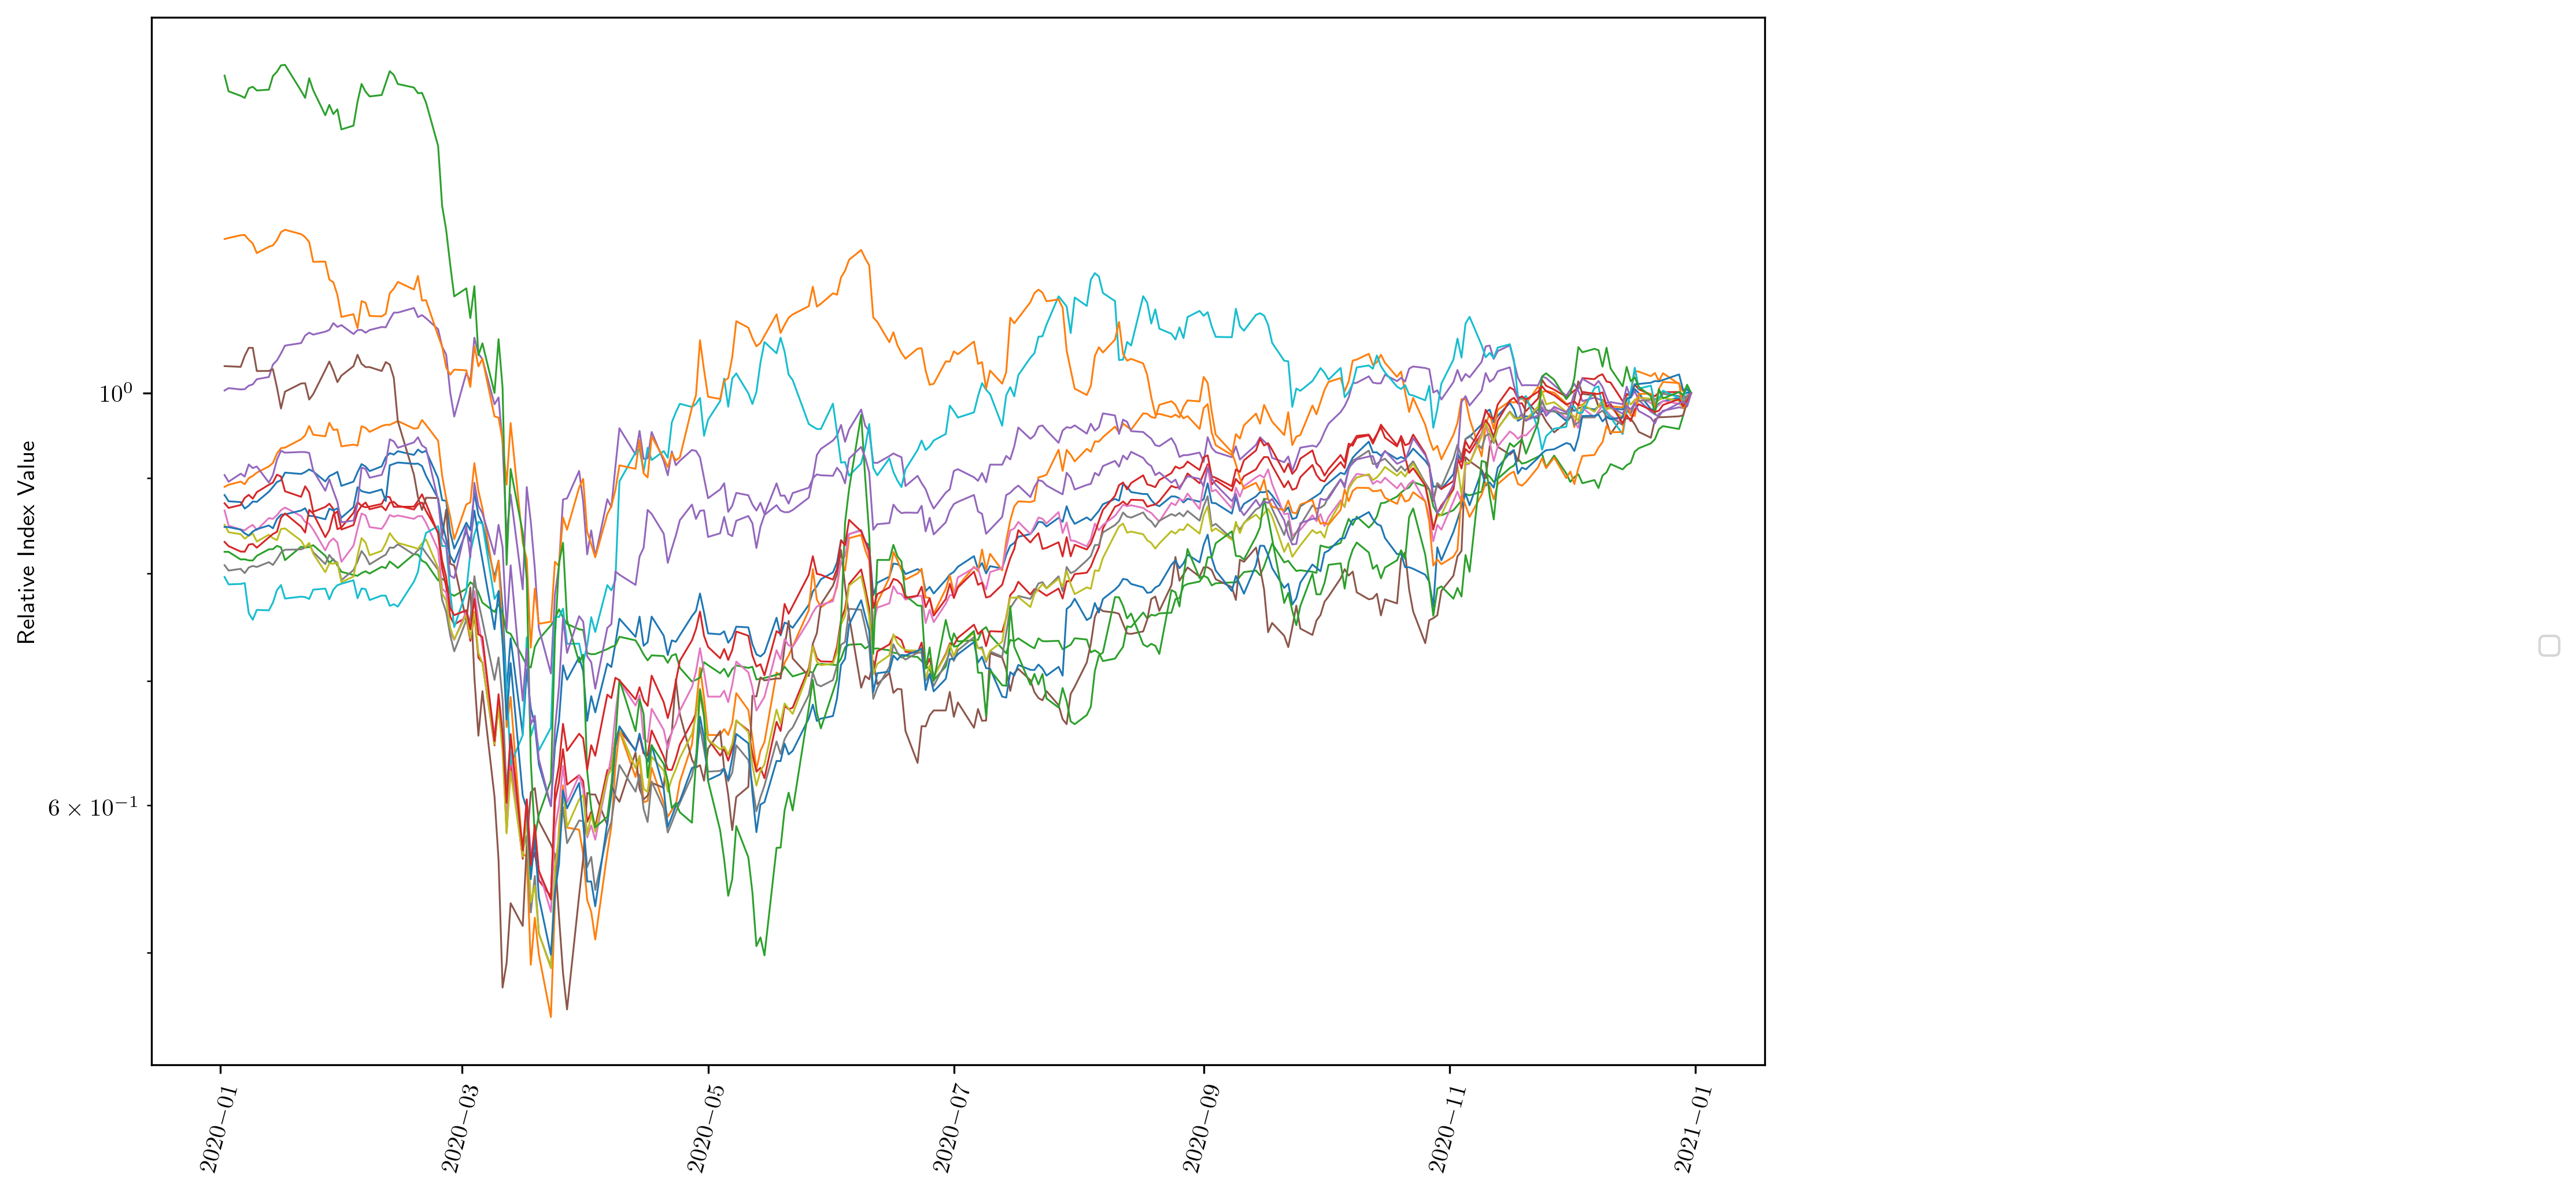

In [22]:
plt.plot(eq / eq.iloc[0, :])
plt.xticks(rotation=75)
plt.legend(loc='upper right')
plt.ylabel('Relative Index Value')
plt.legend(bbox_to_anchor=(1.5,0.4), loc="center right")
plt.yscale('log')
plt.show()

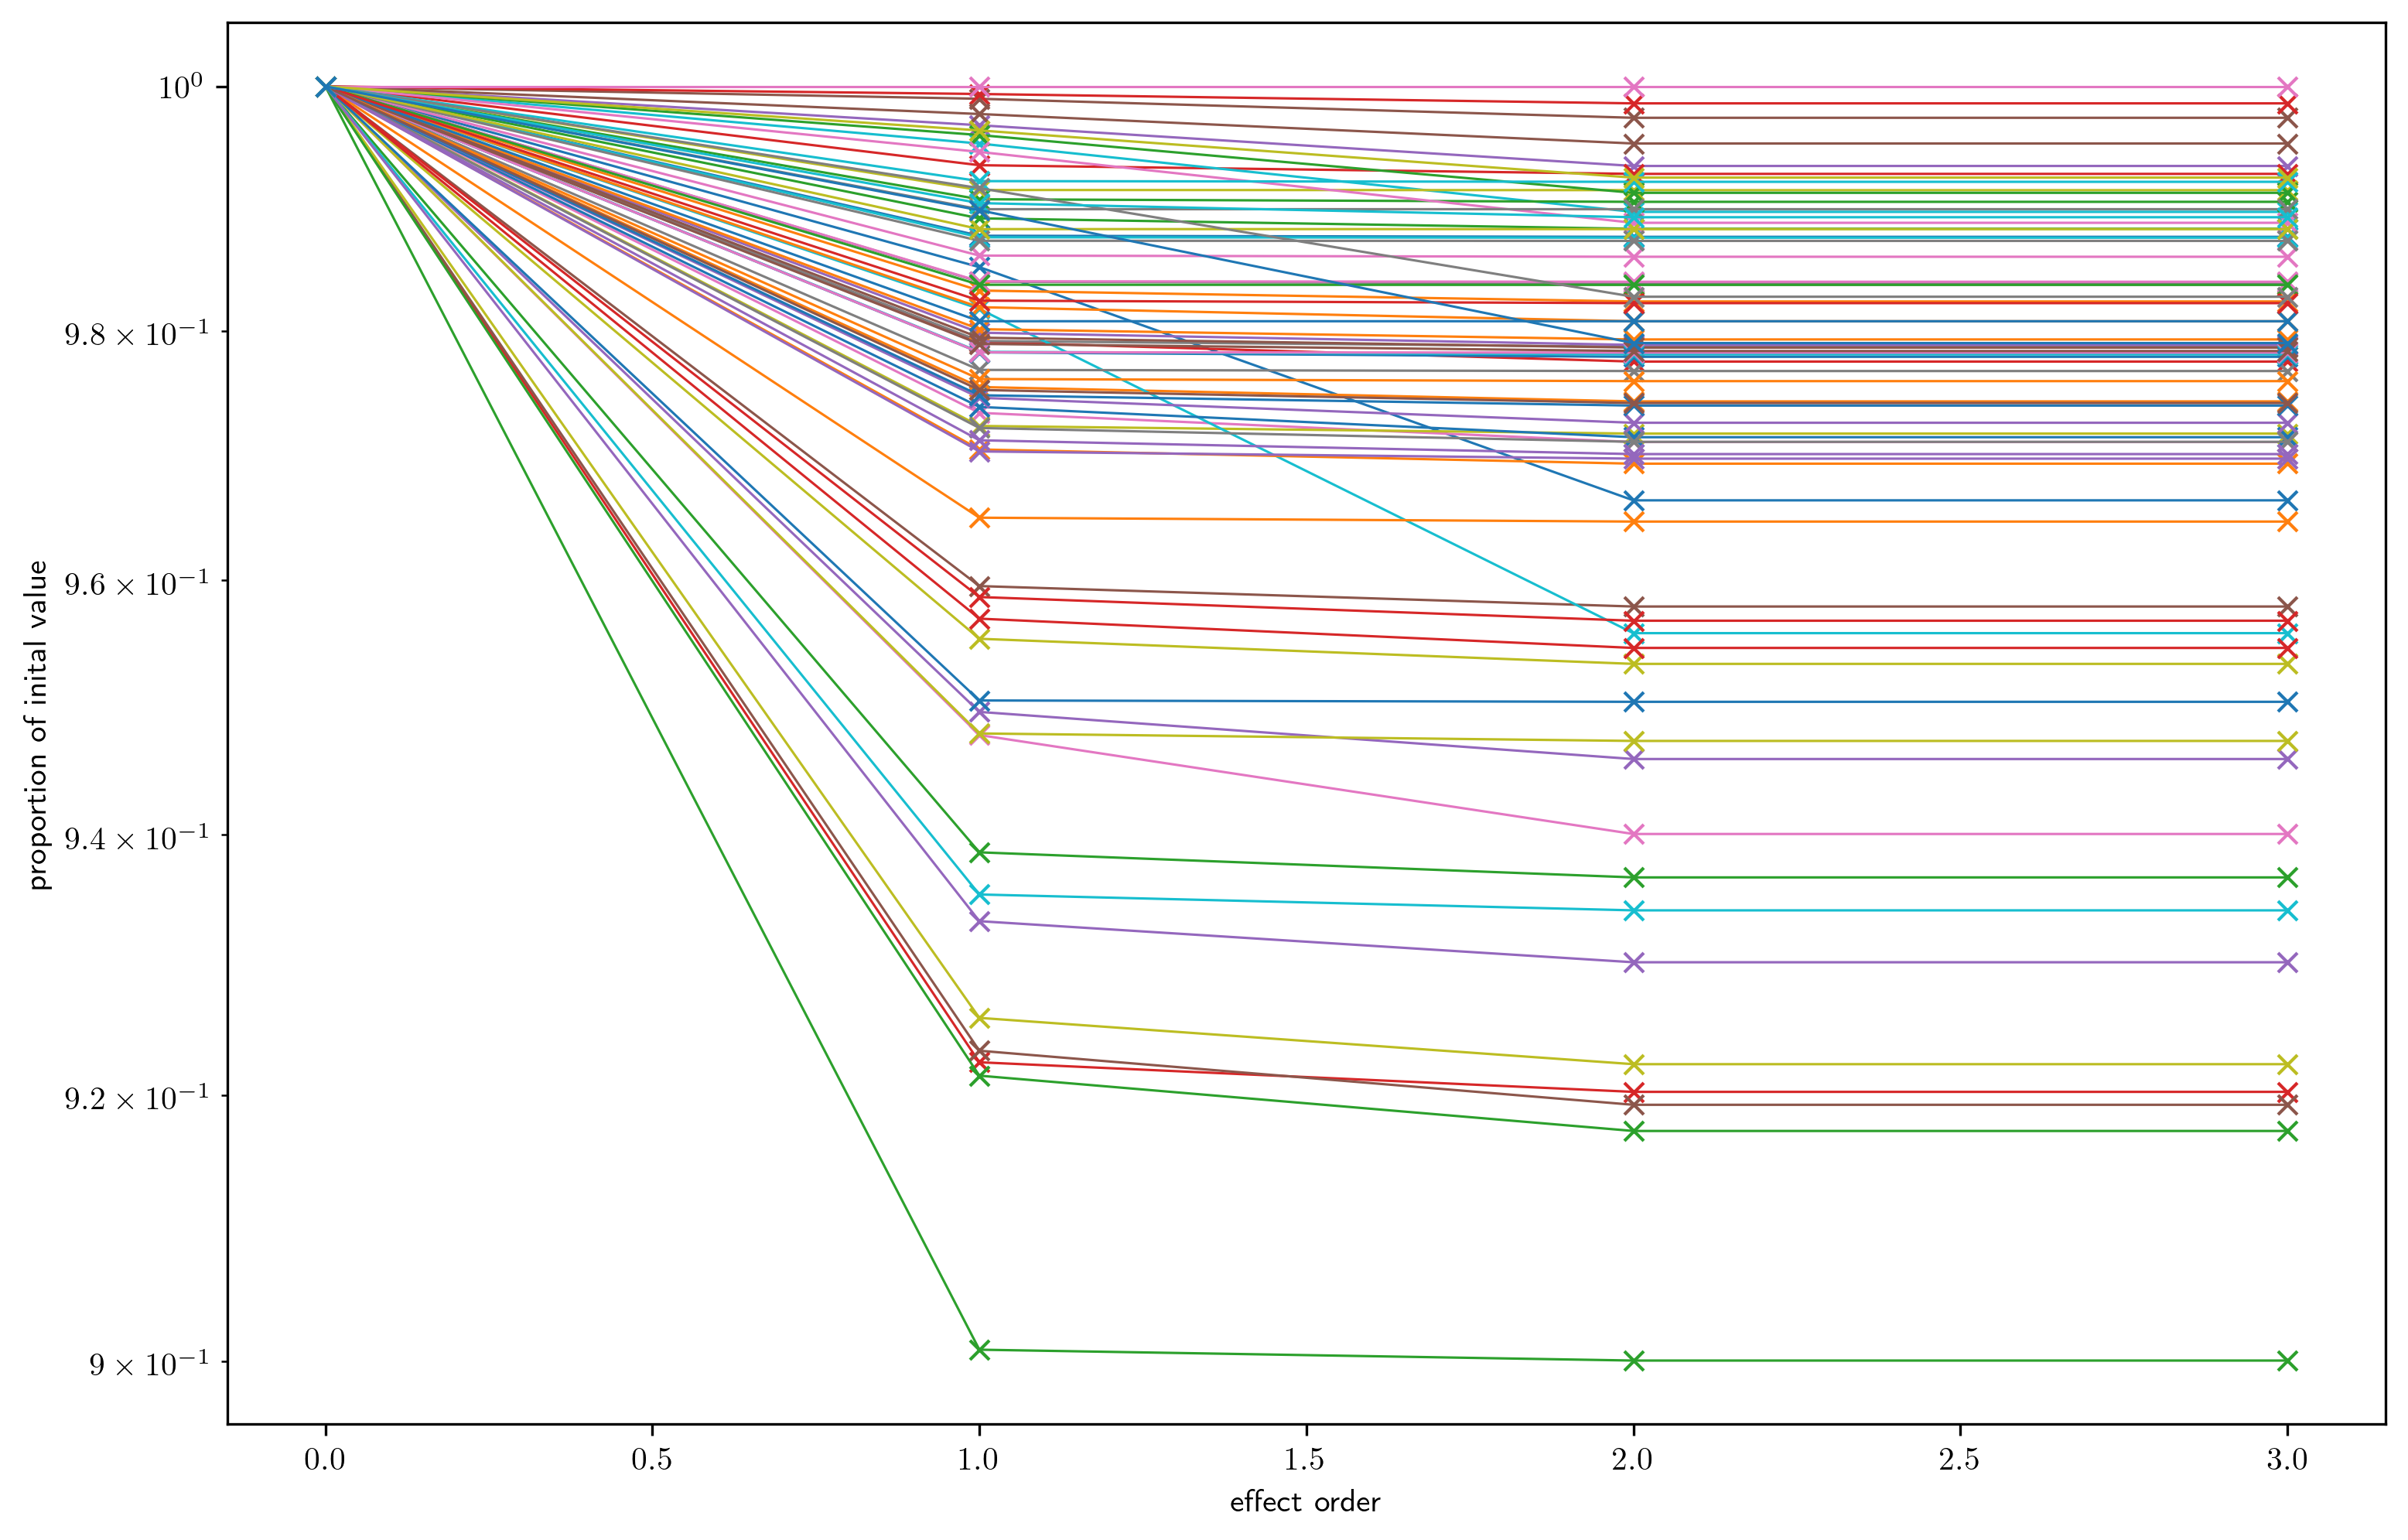

In [23]:
plt.plot(ys / ys[0, :], marker="x")
plt.xlabel("effect order")
plt.ylabel("proportion of inital value")
plt.yscale('log')

In [51]:
ysRel = pd.DataFrame(np.transpose(ys / ys[0, :]), columns = range(0, 4), index = data.Table.industries)

In [52]:
ys = pd.DataFrame(np.transpose(ys), columns = range(0, 4), index = data.Table.industries)

In [54]:
ysRel

,0,1,2,3
Farms,1.0,0.995660,0.981821,0.981821
Forestry,1.0,0.997469,0.989817,0.989817
Oil & Gas,1.0,0.948835,0.835514,0.835514
Mining,1.0,0.990862,0.970276,0.970276
Mining activities,1.0,0.997374,0.988745,0.988745
...,...,...,...,...
Government defense,1.0,1.000000,1.000000,1.000000
Government nondefense,1.0,0.946623,0.885985,0.885985
Federal Government enterprises,1.0,0.990961,0.976319,0.976319
General government,1.0,0.995081,0.982268,0.982268


In [65]:
eq.shape

(253, 15)

In [68]:
eqRel = eq.div(eq.values[0, :], axis="columns")

In [69]:
eqRel

,Water transportation,Housing,Farms,Truck transportation,Utilities,Accommodation,Chemical products,Construction,Machinery,Mining,Real estate,Educational services,Air transportation,Rail transportation,Hospitals
2020-12-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-12-30,1.000641,1.008442,0.989772,0.996186,0.98375,0.990059,0.995164,0.997172,0.992637,1.009127,1.004493,0.990135,1.010476,0.991376,0.985536
2020-12-29,0.998077,1.002226,0.972418,0.993807,0.981784,0.972806,0.98322,0.986852,0.981476,0.99175,1.00386,0.981525,0.99773,0.983972,0.989701
2020-12-28,0.994444,1.011307,0.956532,1.001366,0.982548,0.971685,0.986878,0.996376,0.99046,0.993949,1.023476,1.012556,1.00144,0.99265,0.987539
2020-12-24,0.989957,1.025095,0.959933,1.001278,0.978407,0.970641,0.990406,0.999116,0.994435,1.002989,1.016461,1.013991,0.993453,0.985408,0.977223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-08,0.869872,0.900028,0.812828,0.881577,1.009264,1.057719,0.846958,0.805672,0.83807,0.761397,0.838185,1.209327,1.458839,0.828861,0.915377
2020-01-07,0.866667,0.893249,0.813916,0.878204,1.004938,1.04722,0.843666,0.800069,0.834996,0.790253,0.840479,1.216502,1.441685,0.821603,0.901822
2020-01-06,0.873718,0.896165,0.813726,0.870522,1.00458,1.033104,0.844548,0.804346,0.839604,0.789442,0.844386,1.216143,1.445395,0.821765,0.904982
2020-01-03,0.874573,0.892661,0.821451,0.867418,1.006234,1.033753,0.848588,0.802599,0.841651,0.78901,0.847018,1.212018,1.453514,0.827291,0.896051


## Find best fit for each order

**TODO: Rescale in y - shape matching**